<a href="https://colab.research.google.com/github/hericsaliby/DataScience_Projects/blob/main/Analise_Banco_BTG_(BPAC11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python para Finanças**
*por [Heric Saliby](https://github.com/hericsaliby/DataScience_Projects)*

---

<h1>Análise Financeira </h1>

Aplicações possíveis para Python e Finanças 

Seja para extrair informações de portais de investimento, analisar dados ou usar a Inteligência Artificial para decidir pontos de compra e venda, aprender Python no mundo dos investimentos é a decisão mais inteligente que você poderia ter.

<center><img src="https://www.thepythoncode.com/media/articles/introduction-to-finance-and-technical-indicators-with-python.jpg" height="400px"></center>



### Importar arquivos `csv` com as cotações do BPAC11.SA

Pelo site [Yahoo Finance](https://finance.yahoo.com/quote/BPAC11.SA?p=BPAC11.SA&.tsrc=fin-srch), baixei os dados da ação ordinária do Banco BTG Pactual S.A. (BPAC11) em formato `csv` e disponibilizei o arquivo [neste link](https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv)



Importar esse mesmo arquivo usando o Pandas é tão simples quanto executar a função `pd.read_csv("local_do_arquivo.csv")`, informando qual o endereço que o `csv` se encontra (endereço na internet ou caminho na máquina local).


Vamos supor que você está usando um arquivo csv que se encontra no endereço ```https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv``` e quer baixar o mesmo:

In [ ]:
# baixar o arquivo BBAS3.SA.csv
!wget https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv
  
# ver o diretório
!ls -l

--2022-07-20 00:45:14--  https://raw.githubusercontent.com/hericsaliby/DataScience_Projects/main/BPAC11.SA.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17433 (17K) [text/plain]
Saving to: ‘BPAC11.SA.csv.1’

BPAC11.SA.csv.1     100%[===================>]  17.02K  --.-KB/s    in 0.001s  

2022-07-20 00:45:15 (13.2 MB/s) - ‘BPAC11.SA.csv.1’ saved [17433/17433]

total 1100
-rw-r--r-- 1 root root   17433 Jul 20 00:33 BPAC11.SA.csv
-rw-r--r-- 1 root root   17433 Jul 20 00:45 BPAC11.SA.csv.1
-rw-r--r-- 1 root root 1046997 Jul 20 00:34 quantstats-tearsheet.html
drwxr-xr-x 1 root root    4096 Jul 13 13:43 sample_data
-rw-r--r-- 1 root root   11082 Jul 20 00:33 sigmoidal.png
-rw-r--r-- 1 root root   20480 Jul 20 00:33 yfinance.cache


Pronto! O arquivo `BPAC11.SA.csv` foi importado com sucesso e já está pronto para ser usado neste *notebook*. 

### Conhecendo os componentes básicos do Pandas

Os dois componentes básicos que a gente deve conhecer quando lidando com Pandas são `Series` e `DataFrame`. 

<center><img src="https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/componentes_pandas.png"></center>

Simplificadamente, você pode pensar o `DataFrame` como sendo uma planilha de Excel, e `Series` como sendo apenas uma coluna individual.

Apesar de parecer conceitualmente simples, estas duas estruturas nativas do Pandas facilitam muito o trabalho com dados, uma vez que elas podem armazenar qualquer tipo de dado.

In [ ]:
# importar os pacotes necessários 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importar planilha do drive
df = pd.read_csv("/content/BPAC11.SA.csv")

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,25.454110,25.946610,24.903210,25.400280,25.198780,1.156325e+07
std,3.481557,3.431961,3.444503,3.463513,3.335020,5.331667e+06
min,18.440001,18.709999,18.030001,18.459999,18.459999,2.918600e+06
25%,23.002500,23.582500,22.517500,22.885001,22.735001,8.298950e+06
50%,24.910000,25.469999,24.345000,24.960000,24.925000,1.080395e+07
75%,28.187501,28.520001,27.432499,27.969999,27.664217,1.334315e+07
max,32.250000,32.730000,31.520000,32.270000,31.734743,4.654720e+07


In [ ]:
df['Volume'].std()

5331666.824876908

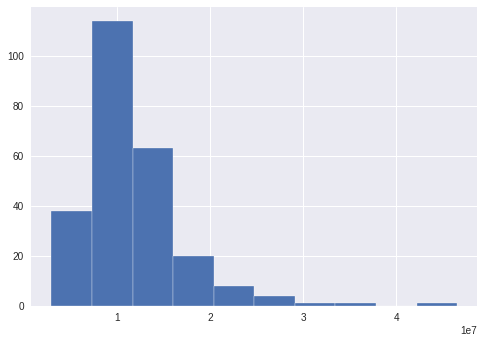

In [ ]:
plt.hist(df['Volume'], bins=10);

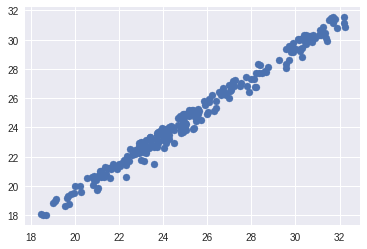

In [ ]:
plt.scatter(df["Open"], df["Low"])

## Bibliotecas para Análise Financeira

Apesar de termos muitas opções de bibliotecas em Python para analisar dados e operar no Mercado, infelizmento o Brasil ainda oferece bem menos alternativas que países como os Estados Unidos.

Claro, isso se dá pelo volume relativo e pela própria maturidade do Mercado. Mas como esse ecossistema é um organismo vivo, em constante evolução, eu recomendo a todos que sempre mantenham uma rotina de pesquisa e estudos, pois isso vai permitir você identificar qualquer novidade ou ferramenta que facilite as suas análises.


### Baixando as cotaçãos do Yahoo Finance com a biblioteca `yfinance`

Umas das bibliotecas mais fáceis e diretas de usar, é a `yfinance`, que fornece *features* como preços de abertura, fechamento, fechamento ajustado, máxima, mínima e voluma, bastando que o usuário do serviço informe o símbolo da ação.

Vale ressaltar que ela não está instalada por padrão no Google Colab, sendo necessária a sua instalação.

In [ ]:
# instalar biblioteca que não acompanha o Colab por padrão
!pip install yfinance -q

In [ ]:
# importar a biblioteca yfinance
import yfinance as yf

In [ ]:
bpac11 = yf.Ticker('BPAC11.SA')

In [ ]:
# pegar os dados históricos de mercado
hist = bpac11.history(period="max")

In [ ]:
# mostrando os 5 primeiros dados
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-02-24,3.762057,3.762057,3.762057,3.762057,5200,0.0,0.0
2017-03-01,3.762057,3.762057,3.710380,3.710380,17200,0.0,0.0
2017-03-02,3.710380,3.710380,3.710380,3.710380,0,0.0,0.0
2017-03-03,3.927422,3.927422,3.824069,3.875745,7200,0.0,0.0
2017-03-06,3.886080,4.030774,3.824068,3.968763,22800,0.0,0.0


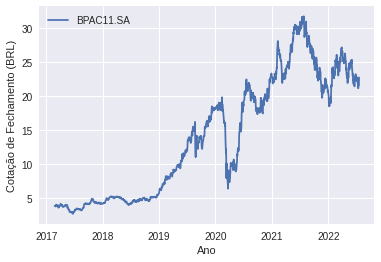

In [ ]:
# Gráfico da cotação de fechamento
from matplotlib import pyplot as plt
%matplotlib inline
plt.plot(hist['Close'], label=bpac11.info['symbol'])
plt.xlabel('Ano')
plt.ylabel('Cotação de Fechamento ({0})'.format(bpac11.info['currency']))
plt.legend()
plt.show()

In [ ]:
c_a = hist['Close'].max()
c_a

31.734743118286133

In [ ]:
#obtendo dados entre o ano de 2019 a 2022
bpac11_e = web.get_data_yahoo('BPAC11.SA', start='2019-01-01', end='2022-12-31')

[*********************100%***********************]  1 of 1 completed


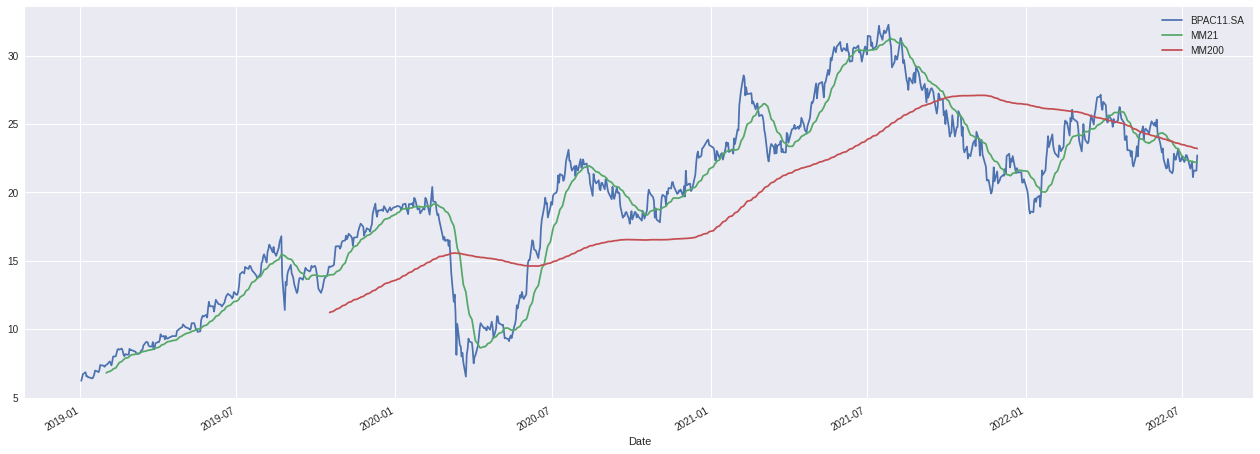

In [ ]:
#Plotando o grafico entre os anos de 2019 e 2022, com a utilizaçao de medias moveis
bpac11_e["Close"].plot(figsize=(22,8), label="BPAC11.SA")
bpac11_e["Close"].rolling(21).mean().plot(label="MM21")
bpac11_e["Close"].rolling(200).mean().plot(label="MM200")
plt.legend();

In [ ]:
# mostrar dividendos, splits
bpac11.actions

,Dividends,Stock Splits
Date,,
2017-07-06,0.171748,0.0
2018-01-05,0.171322,0.0
2018-08-14,0.168363,0.0
2019-01-08,0.173165,0.0
2019-08-09,0.178751,0.0
2020-01-07,0.155105,0.0
2020-07-23,0.147362,0.0
2021-01-07,0.155656,0.0
2021-07-01,0.000000,4.0


In [ ]:
# Agrupando (somando) os dividendos por ano
dividendos = hist['Dividends'].resample('Y').sum()
dividendos

Date
2017-12-31    0.171748
2018-12-31    0.339685
2019-12-31    0.351916
2020-12-31    0.302467
2021-12-31    0.393351
2022-12-31    0.147312
Freq: A-DEC, Name: Dividends, dtype: float64

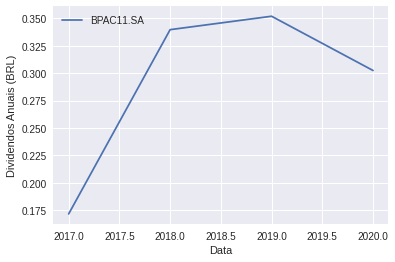

In [ ]:
# Gráfico dos dividendos anuais
plt.plot(dividendos.index.year[:-2], dividendos[:-2], label=bpac11.info['symbol'])
plt.xlabel('Data')
plt.ylabel('Dividendos Anuais ({0})'.format(bpac11.info['currency']))
plt.legend()
plt.show()

In [ ]:
# ver informações da ação
bpac11.info

{'52WeekChange': -0.31677216,
 'SandP52WeekChange': -0.11385685,
 'address1': 'Av. Brigadeiro Faria Lima, 3.477',
 'address2': '14th Floor PAtio Victor Malzoni - Itaim Bibi',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 22.91,
 'askSize': 0,
 'averageDailyVolume10Day': 7981440,
 'averageVolume': 10151814,
 'averageVolume10days': 7981440,
 'beta': 1.725293,
 'beta3Year': None,
 'bid': 22.4,
 'bidSize': 0,
 'bookValue': 3.416,
 'category': None,
 'circulatingSupply': None,
 'city': 'São Paulo',
 'coinMarketCapLink': None,
 'companyOfficers': [],
 'country': 'Brazil',
 'currency': 'BRL',
 'currentPrice': 22.71,
 'currentRatio': None,
 'dateShortInterest': None,
 'dayHigh': 0,
 'dayLow': 0,
 'debtToEquity': None,
 'dividendRate': 0.22,
 'dividendYield': 0.01,
 'earningsGrowth': 0.6,
 'earningsQuarterlyGrowth': 0.651,
 'ebitda': None,
 'ebitdaMargins': 0,
 'enterpriseToEbitda': None,
 'enterpriseToRevenue': 15.971,
 'enterpriseValue': 33573

In [ ]:
bpac11.financials

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,1088810000.0,4473007000.0,2303143000.0,3066887000.0
Minority Interest,128286000.0,125473000.0,229370000.0,592757000.0
Net Income,2383863000.0,3408583000.0,5623498000.0,3369246000.0
Selling General Administrative,2385309000.0,4532971000.0,5261092000.0,3002049000.0
Gross Profit,5487472000.0,9506319000.0,3863700000.0,5602465000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,851881000.0,4049053000.0,-2502887000.0,2448457000.0
Other Operating Expenses,2250282000.0,924295000.0,1105495000.0,151959000.0


In [ ]:
#informaçao por trimestre
bpac11.quarterly_financials

,2018-03-31,2017-12-31,2017-09-30,2017-06-30
Research Development,None,None,None,None
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,759136000.0,571934000.0,-729035000.0,253635000.0
Minority Interest,166391000.0,128286000.0,140439000.0,137919000.0
Net Income,600358000.0,660379000.0,500859000.0,502558000.0
Selling General Administrative,594461000.0,634886000.0,664731000.0,507872000.0
Gross Profit,1481313000.0,1366149000.0,1670070000.0,765806000.0
Ebit,0.0,0.0,0.0,0.0
Operating Income,760704000.0,534898000.0,-775577000.0,155117000.0
Other Operating Expenses,126148000.0,196365000.0,1780916000.0,102817000.0


In [ ]:
# Holders Majoritários
bpac11.major_holders

,0,1
0,0.00%,% of Shares Held by All Insider
1,20.86%,% of Shares Held by Institutions
2,20.86%,% of Float Held by Institutions
3,402,Number of Institutions Holding Shares


In [ ]:
#Holders Institucionais
bpac11.institutional_holders

In [ ]:
#Balanço Patrimonial
bpac11.balance_sheet

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Intangible Assets,1.694820e+08,1.744500e+08,4.922240e+08,2.137100e+08
Total Liab,1.079355e+11,9.391886e+10,2.346060e+11,1.473368e+11
Total Stockholder Equity,1.852781e+10,1.772722e+10,1.971326e+10,1.473333e+10
Minority Interest,1.282860e+08,1.254730e+08,2.293700e+08,5.927570e+08
Other Current Liab,1.759478e+10,2.048852e+10,3.734152e+10,1.672722e+10
Total Assets,1.265916e+11,1.117716e+11,2.545487e+11,1.626629e+11
Common Stock,7.392092e+09,7.220526e+09,7.180526e+09,6.406863e+09
Other Current Assets,8.227090e+09,9.609674e+09,1.892069e+10,6.824138e+09
Retained Earnings,1.046128e+10,9.885256e+09,1.252152e+10,8.286022e+09
Other Liab,6.122481e+09,4.060240e+09,5.546463e+09,3.391965e+09


In [ ]:
bpac11.quarterly_balance_sheet

,2018-03-31,2017-12-31,2017-09-30,2017-06-30
Intangible Assets,1.781560e+08,1.694820e+08,1.802090e+08,1.806870e+08
Total Liab,1.274652e+11,1.079355e+11,9.496010e+10,1.008960e+11
Total Stockholder Equity,1.870249e+10,1.852781e+10,1.860930e+10,1.807931e+10
Minority Interest,1.663910e+08,1.282860e+08,1.404390e+08,1.379190e+08
Other Current Liab,1.874376e+10,1.759478e+10,1.426643e+10,1.634994e+10
Total Assets,1.463341e+11,1.265916e+11,1.137098e+11,1.191132e+11
Common Stock,7.392092e+09,7.392092e+09,7.220526e+09,7.220526e+09
Other Current Assets,1.704779e+10,8.227090e+09,1.230127e+10,1.175291e+10
Retained Earnings,1.054993e+10,1.046128e+10,1.051722e+10,1.028454e+10
Other Liab,6.027100e+09,6.122481e+09,5.727738e+09,5.491186e+09


In [ ]:
#Fluxo de caixa
bpac11.cashflow

,2017-12-31,2016-12-31,2015-12-31,2014-12-31
Investments,9.723260e+08,1.870279e+09,-8.984140e+08,-9.999180e+08
Change To Liabilities,-2.121000e+07,-1.685920e+08,1.392310e+08,-7.207000e+06
Total Cashflows From Investing Activities,1.267275e+09,-1.091328e+10,1.984274e+10,-1.521776e+09
Net Borrowings,-3.409824e+09,-1.201668e+10,-1.559361e+09,7.753655e+09
Total Cash From Financing Activities,-3.738351e+09,-4.849106e+10,-1.076339e+10,8.824392e+09
Change To Operating Activities,9.481709e+09,2.869282e+10,5.142809e+09,7.207700e+08
Net Income,2.383863e+09,3.408583e+09,5.623498e+09,3.369246e+09
Change In Cash,9.227257e+09,-2.445559e+10,1.600703e+10,1.166714e+10
Total Cash From Operating Activities,1.169833e+10,3.494874e+10,6.927689e+09,4.364529e+09
Depreciation,3.218250e+08,4.651220e+08,2.099130e+08,2.427320e+08


In [ ]:
#Ganhos
bpac11.earnings

,Revenue,Earnings
Year,,
2014,5602465000,3369246000
2015,3863700000,5623498000
2016,9506319000,3408583000
2017,5487472000,2383863000


In [ ]:
#Sustentabilidade
bpac11.sustainability

In [ ]:
#Calendario de proximos eventos
bpac11.calendar

,Value
Earnings Date,2022-08-09 11:30:00
Earnings Average,None
Earnings Low,None
Earnings High,None
Revenue Average,4303810000
Revenue Low,4183940000
Revenue High,4384310000


In [ ]:
#Noticias relacionadas ao Banco BTG
bpac11.news

[{'link': 'https://finance.yahoo.com/news/tsx-venture-exchange-stock-maintenance-004100579.html',
  'providerPublishTime': 1658277660,
  'publisher': 'CNW Group',
  'thumbnail': {'resolutions': [{'height': 16,
     'tag': 'original',
     'url': 'https://s.yimg.com/uu/api/res/1.2/L.Kg_RfrGmJkc5VAi5YvuQ--~B/aD0xNjt3PTE2O2FwcGlkPXl0YWNoeW9u/https://s.yimg.com/uu/api/res/1.2/4BTfLjRr1aPEYXYlASKDXQ--~B/aD0xNjt3PTE2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/cnwgroup.com/0788ed7e2bfaa38679a6722fe884ff32',
     'width': 16},
    {'height': 140,
     'tag': '140x140',
     'url': 'https://s.yimg.com/uu/api/res/1.2/FQfpcbNO6QYirsOia6zwGA--~B/Zmk9ZmlsbDtoPTE0MDtweW9mZj0wO3c9MTQwO2FwcGlkPXl0YWNoeW9u/https://s.yimg.com/uu/api/res/1.2/4BTfLjRr1aPEYXYlASKDXQ--~B/aD0xNjt3PTE2O2FwcGlkPXl0YWNoeW9u/https://media.zenfs.com/en/cnwgroup.com/0788ed7e2bfaa38679a6722fe884ff32',
     'width': 140}]},
  'title': 'TSX Venture Exchange Stock Maintenance Bulletins',
  'type': 'STORY',
  'uuid': '7376d5de-b807

Para utilizar o recurso de cache, ou seja, armazenar chamadas à API de sessões anteriores, ou mesmo customizar o cabeçalho `User-agent`, utilize o código abaixo (descrito na documentação da biblioteca).

In [ ]:
!pip install requests_cache -q
import requests_cache

session = requests_cache.CachedSession('yfinance.cache')
session.headers['User-agent'] = 'my-program/1.0'
ticker = yf.Ticker('bbas3.sa itub4.sa', session=session)

ticker.actions

- BBAS3.SA ITUB4.SA: No data found, symbol may be delisted


[]

Para inicializar vários ativos instanciados em classes `Ticker`, informe os símbolos das ações da seguinte maneira.

In [ ]:
tickers = yf.Tickers('bbas3.sa itub3.sa BPAC11.SA')
# returna uma tupla com objetos Ticker

# para acessar cada ativo individual
tickers.tickers['BBAS3.SA'].info
tickers.tickers['ITUB3.SA'].history(period="1mo")
tickers.tickers['BPAC11.SA'].actions

,Dividends,Stock Splits
Date,,
2017-07-06,0.171748,0.0
2018-01-05,0.171322,0.0
2018-08-14,0.168363,0.0
2019-01-08,0.173165,0.0
2019-08-09,0.178751,0.0
2020-01-07,0.155105,0.0
2020-07-23,0.147362,0.0
2021-01-07,0.155656,0.0
2021-07-01,0.000000,4.0


In [ ]:
# ace
tickers.symbols

['BBAS3.SA', 'ITUB3.SA', 'BPAC11.SA']

### Portfolio Analytics for Quants (QuantStats)

Essa é uma biblioteca para proceder com análises quantitativas, trazendo profundidade nas análises e métricas de risco.

A biblioteca `quantstats` é composta de 3 módulos principais:

1. `quantstats.stats` - para calcular várias métricas de perfomance, como Índice de Sharpe, Win rate, Volatilidade, etc.

2. `quantstats.plots` - para visualizar performance, drawdowns, rolling statistics, monthly returns, entre outros.

3. `quantstats.reports` - para gerar relatórios de métricas, assim como gerar planilhas que podem ser salvas em um arquivo HTML.

Assim como fizemos com a biblioteca `yfinance`, é necessário proceder com a instalação manual da biblioteca no Colab.

In [ ]:
# instalar biblioteca que não acompanha o Colab por padrão
!pip install quantstats -q

In [ ]:
# importar a biblioteca quantstats
import quantstats as qs

In [ ]:
# extender as funcionalidades para o Pandas
qs.extend_pandas()

In [ ]:
# baixar dados para a ação ITUB3
BTG = qs.utils.download_returns('BPAC11.SA')

In [ ]:
# mostrar o índice de sharpe
qs.stats.sharpe(BTG)

0.9364166523657667

In [ ]:
# ou usando a funcionalidade extend_pandas
BTG.sharpe()

0.9364166523657667

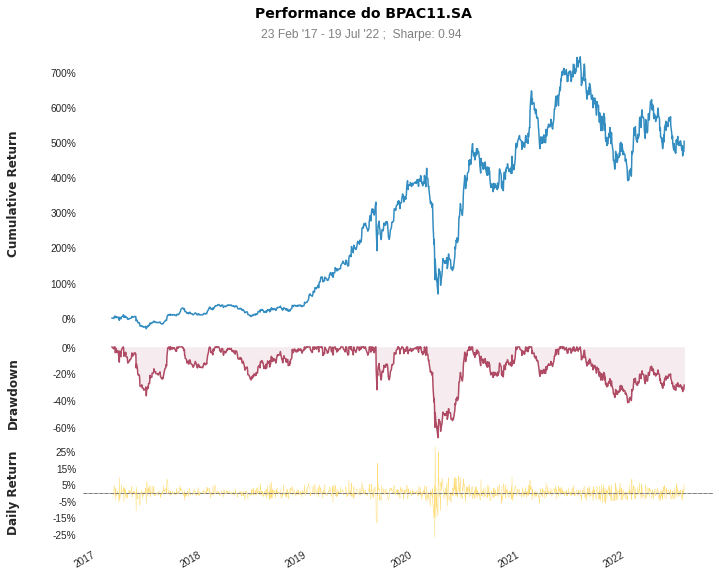

In [ ]:
# visualizando a performance de uma ação
qs.plots.snapshot(BTG, title="Performance do BPAC11.SA")

Uma das funcionalidades mais poderosas da biblioteca `quantstats` é a sua capacidade de gerar relatórios com apenas uma linha de código.

Dentro da ferramenta você encontrará 7 tipos possíveis de relatórios:

1. `qs.reports.metrics(mode='basic', ...)`

2. `qs.reports.metrics(mode='full", ...)`

3. `qs.reports.plots(mode='basic", ...)`

4. `qs.reports.plots(mode='full", ...)`

5. `qs.reports.basic(...)`

6. `qs.reports.full(...)`

7. `qs.reports.html(...)`

Um parâmetro importante que pode ser passado, é o símbolo de um ativo para servir de benchmar.

[Performance Metrics]

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2017-02-24  2017-02-24
End Period                 2022-07-19  2022-07-19
Risk-Free Rate             0.0%        0.0%
Time in Market             96.0%       100.0%

Cumulative Return          503.66%     47.38%
CAGR﹪                     39.51%      7.45%

Sharpe                     0.94        0.41
Prob. Sharpe Ratio         98.45%      82.45%
Smart Sharpe               0.86        0.38
Sortino                    1.4         0.55
Smart Sortino              1.29        0.51
Sortino/√2                 0.99        0.39
Smart Sortino/√2           0.91        0.36
Omega                      1.2         1.2

Max Drawdown               -68.01%     -46.82%
Longest DD Days            357         406
Volatility (ann.)          48.86%      26.27%
R^2                        0.42        0.42
Information Ratio          0.06        0.06
Calmar           

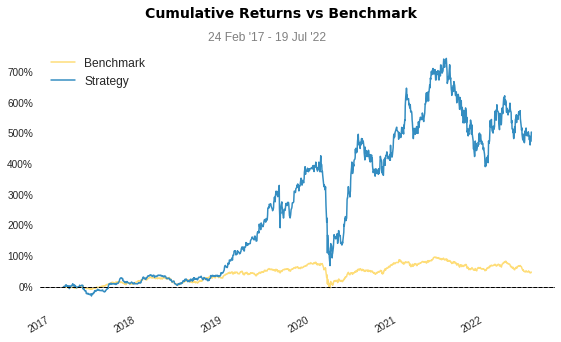

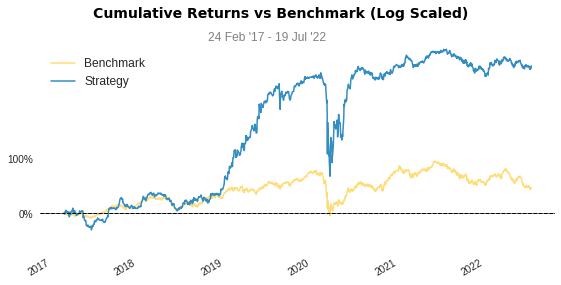

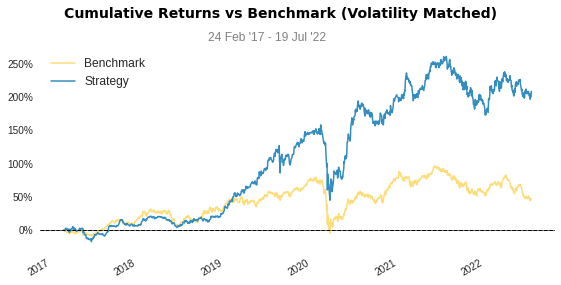

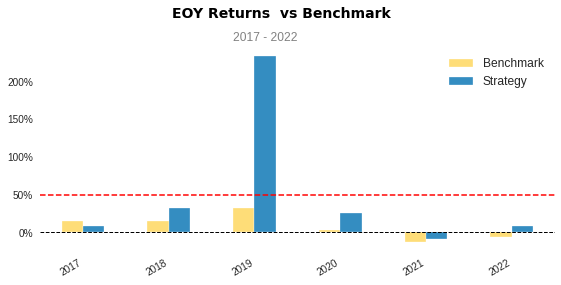

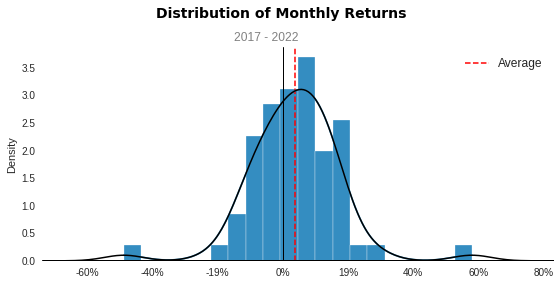

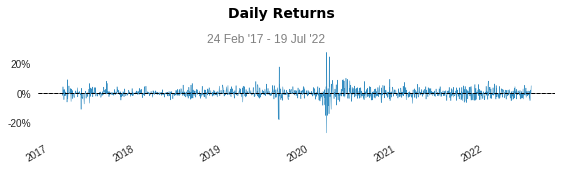

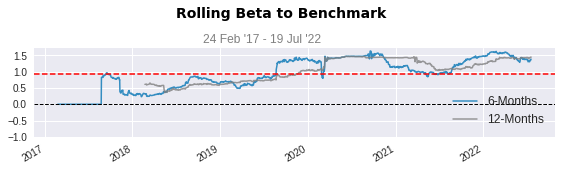

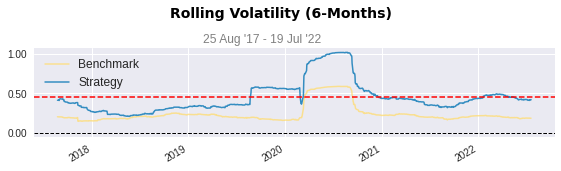

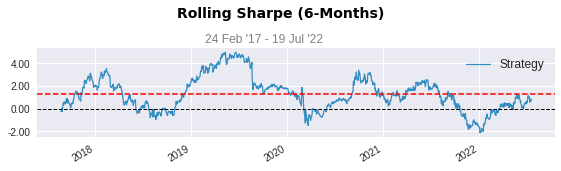

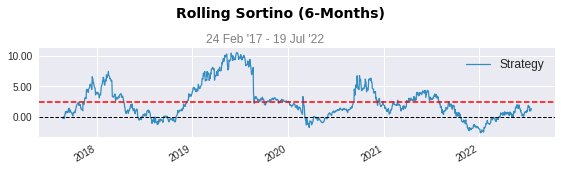

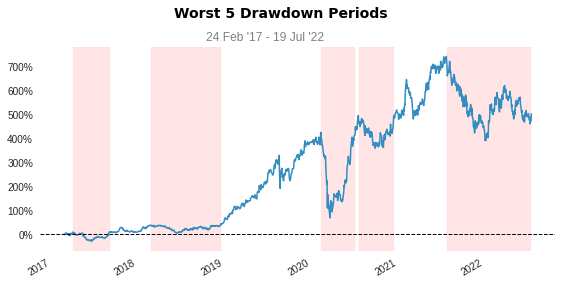

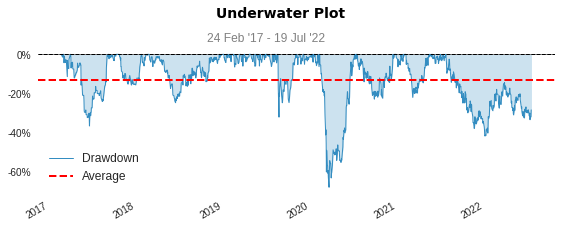

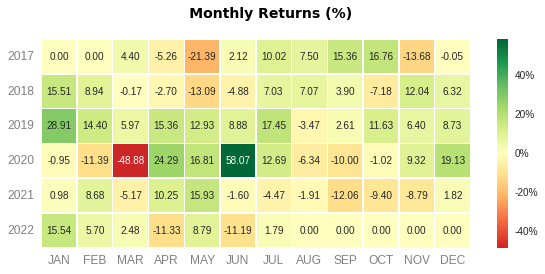

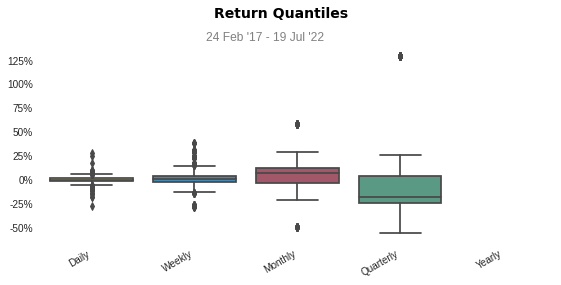

In [ ]:
# exemplo de relatório completo
qs.reports.full(BTG, benchmark="^BVSP")

In [ ]:
# gerar relatório em um arquivo html
qs.reports.html(BTG, benchmark="^BVSP", output='relatorio.html')

In [ ]:
# gerar itens do relatório individualmente
BTG.monthly_returns()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,EOY
2017,0.000000,0.000000,0.043956,-0.052632,-0.213889,0.021202,0.100199,0.075000,0.153611,0.167639,-0.136756,-0.000526,0.091312
2018,0.155079,0.089362,-0.001736,-0.026956,-0.130920,-0.048843,0.070270,0.070700,0.039024,-0.071831,0.120384,0.063205,0.330060
2019,0.289063,0.143967,0.059675,0.153610,0.129289,0.088808,0.174528,-0.034687,0.026118,0.116330,0.063963,0.087300,2.330228
2020,-0.009498,-0.113909,-0.488831,0.242866,0.168142,0.580672,0.126877,-0.063411,-0.099951,-0.010158,0.093191,0.191298,0.260762
2021,0.009801,0.086758,-0.051690,0.102524,0.159346,-0.016042,-0.044732,-0.019092,-0.120647,-0.094000,-0.087859,0.018187,-0.092532
2022,0.155449,0.056988,0.024793,-0.113287,0.087917,-0.111863,0.017929,0.000000,0.000000,0.000000,0.000000,0.000000,0.091524


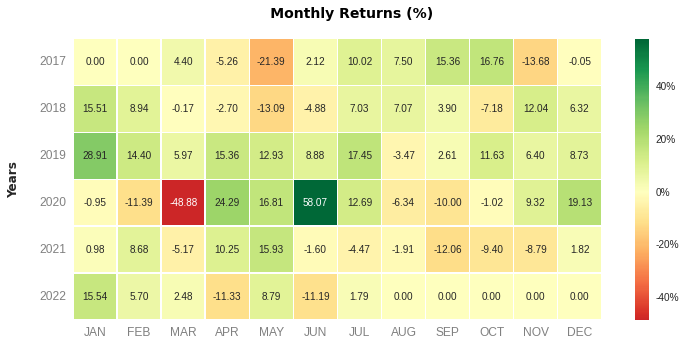

In [ ]:
# gerar itens do relatório individualmente
BTG.plot_monthly_heatmap()

In [ ]:
# gerar itens do relatório individualmente
BTG.volatility()

0.4885734351052763

In [ ]:
# listar todas as features disponíveis
dir(qs.stats)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_ceil',
 '_linregress',
 '_norm',
 '_np',
 '_pd',
 '_sqrt',
 '_utils',
 'adjusted_sortino',
 'autocorr_penalty',
 'avg_loss',
 'avg_return',
 'avg_win',
 'best',
 'cagr',
 'calmar',
 'common_sense_ratio',
 'comp',
 'compare',
 'compsum',
 'conditional_value_at_risk',
 'consecutive_losses',
 'consecutive_wins',
 'cpc_index',
 'cvar',
 'distribution',
 'drawdown_details',
 'expected_return',
 'expected_shortfall',
 'exposure',
 'gain_to_pain_ratio',
 'geometric_mean',
 'ghpr',
 'greeks',
 'implied_volatility',
 'information_ratio',
 'kelly_criterion',
 'kurtosis',
 'max_drawdown',
 'monthly_returns',
 'omega',
 'outlier_loss_ratio',
 'outlier_win_ratio',
 'outliers',
 'payoff_ratio',
 'pct_rank',
 'probabilistic_adjusted_sortino_ratio',
 'probabilistic_ratio',
 'probabilistic_sharpe_ratio',
 'probabilistic_sortino_ratio',
 'profit_factor',
 'profit_ratio',
 'r2',
 'r_square

### Technical Analysis Library (TA)

`ta` é uma biblioteca voltada para a análise de séries temporais financeiras (abertura, fechamento, máxima, mínima e volume).

Pensada para servir como apoio às técnicas de *feature engineering* no contexto do Python, a mesma é construída em cima da conhecida biblioteca `pandas`.

Assim como as anteriores, faz-se necessária sua instalação dentro do ambiente Google Colab.


In [ ]:
# instalar ta
!pip install ta -q

In [ ]:
# importar ta
import ta

# ou importar apenas aquilo que vamos usar da biblioteca
from ta.volatility import BollingerBands

In [ ]:
# baixar dados da BPAC11.SA para exemplo
df = yf.download('BPAC11.SA')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-02-24,4.5500,4.5500,4.5500,4.5500,3.762057,5200
2017-03-01,4.5500,4.5500,4.4875,4.4875,3.710380,17200
2017-03-02,4.4875,4.4875,4.4875,4.4875,3.710380,0
2017-03-03,4.7500,4.7500,4.6250,4.6875,3.875745,7200
2017-03-06,4.7000,4.8750,4.6250,4.8000,3.968763,22800


Veja um exemplo onde facilmente conseguimos calcular as bandas superior e inferior de Bollinger.

#### Bandas de Bollinger

Como exemplo de aplicação das Bandas de Bollinger, vamos relembrar que elas consistem em três partes: Banda do Meio, Banda Superior e Banda Inferior.

Muito utilizadas quando se busca um indicador de volatilidade de um determinado ativo, elas servem de insumos para o processo decisório de compra ou venda de um papel.



<center><img src="https://origin2.cdn.componentsource.com/sites/default/files/resources/dundas/538216/Documentation/images/BollingerBands.png" height="200px"></center>


Por padrão, é utilizado o valor de 20 períodos para seu cálculo. Mas claro que pode ser alterado de acordo com a análise desejada, sendo o período `n = 20` apenas uma recomendação do próprio Bollinger, criador do indicador.

Matematicamente, os cálculos das Bandas é definido da seguinte maneira, sendo $y$ o valor do Fechamento (`Close`) da cotação.

\begin{align*}
&\mathbf{MA} = \frac{\sum\limits_{i=1}^n y_i}{n}\\
&\mathbf{UpperBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}\\
&\mathbf{LowerBB} = MA + D \sqrt{\frac{\sum\limits_{i=1}^n (y_i - MA)^2}{n}}
\end{align*}

Um investidor poderia desejar calcular tais valores, mas observe como tudo se torna muito simples e direto com a biblioteca `ta`.

In [ ]:
bb = BollingerBands(close=df["Close"], window=20, window_dev=2)

Agora, basta apenas extrair os cálculos desse indicador. No caso, irei associar cada um deles a uma nova coluna dentro do mesmo DataFrame.

In [ ]:
df['bb_bbm'] = bb.bollinger_mavg()
df['bb_bbh'] = bb.bollinger_hband()
df['bb_bbl'] = bb.bollinger_lband()

In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,
2022-07-13,21.750000,22.500000,21.459999,22.200001,22.200001,9438600,22.3135,23.194847,21.432154
2022-07-14,21.700001,21.850000,20.969999,21.120001,21.120001,13823900,22.2470,23.266924,21.227076
2022-07-15,21.480000,21.809999,21.260000,21.600000,21.600000,14042600,22.2475,23.266144,21.228856
2022-07-18,21.799999,22.049999,21.430000,21.590000,21.590000,5945700,22.2570,23.246992,21.267008
2022-07-19,0.000000,0.000000,0.000000,22.709999,22.709999,0,22.3110,23.275798,21.346202


De maneira simples, com poucas linhas de código, calculamos os valores das Bandas de Bollinger.

Veja como é simples e direto plotar essas informações diretamente do DataFrame.

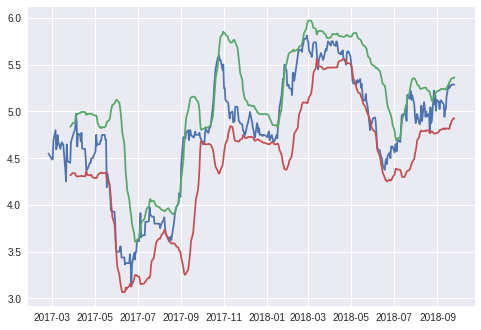

In [ ]:
# importar matplotlib
import matplotlib.pyplot as plt

plt.plot(df["Close"][:400])
plt.plot(df["bb_bbh"][:400])
plt.plot(df["bb_bbl"][:400])

A verdade é que existem bibliotecas mais modernas e interativas, mais adequadas para o contexto dos indicadores. Por esse motivo iremos conhecer o `plotly` futuramente.

Seria tedioso percorrermos todas os indicadores presentes na `ta`. Por isso, agora eu te convido a parar a sequência de aulas e acessar a documentação da biblioteca.

Procure e treine neste mesmo notebook, como calcular valores para os indicadores que você mais utiliza.

[Repositório e documentação da biblioteca TA](https://github.com/bukosabino/ta)

In [ ]:
import pandas as pd
import ta

In [ ]:
df = pd.read_csv("/content/BPAC11.SA.csv", sep=",")

In [ ]:
df = ta.utils.dropna(df)

print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
df = ta.add_all_ta_features(
    df, "Open", "High", "Low", "Close", "Volume", fillna=True
)

print(df.columns)
print(len(df.columns))

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'trend_ichimoku_conv',

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import ta

In [ ]:
# Load data
df = pd.read_csv("/content/BPAC11.SA.csv", sep=',')
df = ta.utils.dropna(df)

In [ ]:
df.shape

(250, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-06-01,31.447500,31.447500,29.902500,30.500000,29.994099,17543600
1,2021-06-02,30.549999,30.844999,30.000000,30.325001,29.822004,15822800
2,2021-06-04,30.125000,30.715000,30.049999,30.562500,30.055563,12745600
3,2021-06-07,30.417500,30.697500,29.799999,30.372499,29.868715,12547200
4,2021-06-08,30.610001,30.905001,30.139999,30.875000,30.362881,18486800


In [ ]:
# Add all ta features filling nans values
df = ta.add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume", fillna=True)

/usr/local/lib/python3.7/dist-packages/ta/trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.7/dist-packages/ta/trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [ ]:
df.shape

(250, 93)

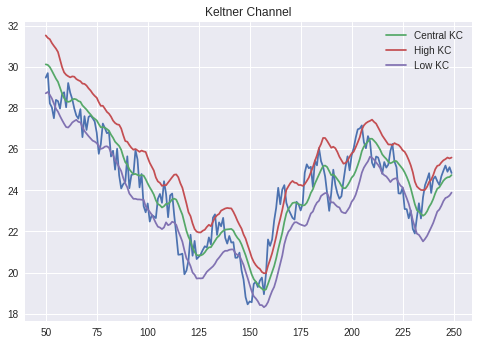

In [ ]:
#Plotando Canal de Keltner
plt.plot(df[50: 250].Close)
plt.plot(df[50: 250].volatility_kcc, label='Central KC')
plt.plot(df[50: 250].volatility_kch, label='High KC')
plt.plot(df[50: 250].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

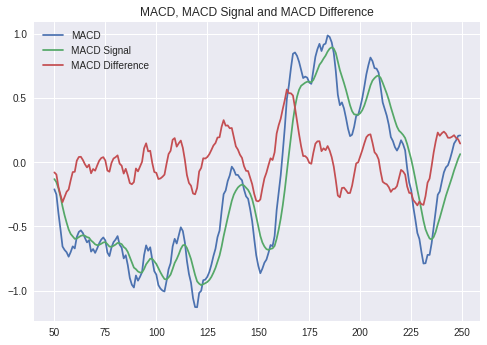

In [ ]:
#plotando MACD
plt.plot(df[50: 250].trend_macd, label='MACD')
plt.plot(df[50: 250].trend_macd_signal, label='MACD Signal')
plt.plot(df[50: 250].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()